In [2]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid
import networkx as nx
from mesa.space import NetworkGrid
import time, enum, math
from mesa.datacollection import DataCollector

In [19]:



class NetworkInfectionModel(Model):
    """A model for infection spread."""

    def __init__(self, N=10, pcontact=0.4, ptrans=0.5, avg_node_degree=3,
                 progression_period=3, progression_sd=2, recovery_rate=0.0193, recovery_days=1/0.0193,
                 recovery_sd=7):
        #My shit here:
        self.num_nodes = N  
        self.pcontact=pcontact
        n = 100
        self.A_prob = np.random.rand(N,N)
        self.A = (self.A_prob<pcontact).astype('int')
        #----------------------------#
        #           Myshit
        #
        #----------------------------#
        
        
        
        
        #self.num_nodes = N  
        #self.pcontact=pcontact
        
        prob = avg_node_degree / self.num_nodes

        self.initial_outbreak_size = 1
        
        self.recovery_sd = recovery_sd
        self.ptrans = ptrans
        self.recovery_rate = recovery_rate
        self.recovery_days = int(1/recovery_rate)
        self.G = nx.Graph(self.A)
        self.grid = MultiGrid(self.G)

        self.schedule = RandomActivation(self) #activate the step of Agents in random orders
        self.running = True
        #self.dead_agents = []

        # Create agents
        for i, node in enumerate(self.G.nodes()):
            a = CovidAgent(i+1, self)
            self.G.add_node(a)
            #add agent
            self.grid.place_agent(a, node)
            self.A_prob = np.random.rand(N+i,N+i)
            self.A = (self.A_prob<pcontact).astype('int')
            #make some agents infected at start
            infected = np.random.choice([0,1], p=[0.99,0.01])
            if infected == 1:
                a.state = State.INFECTED
                a.recovery_time = self.get_recovery_time()

        self.datacollector = DataCollector(            
            agent_reporters={"State": 'state'})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [20]:
from mesa.datacollection import DataCollector
model = NetworkInfectionModel(300, ptrans=0.2)
model.step()
model
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

TypeError: 'Graph' object cannot be interpreted as an integer

TypeError: 'Graph' object cannot be interpreted as an integer

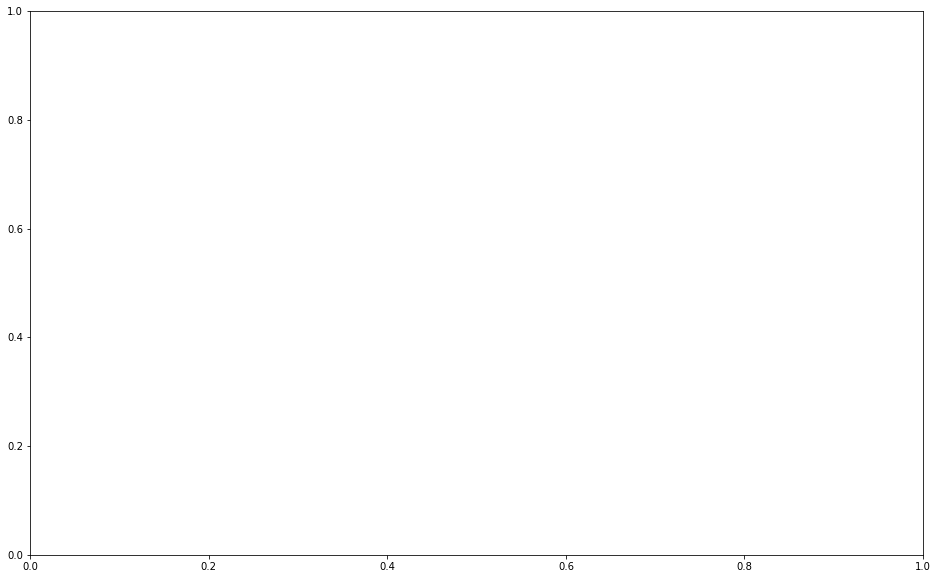

In [21]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = ListedColormap(["lightblue", "red", "green",])

def plot_grid(model,fig,layout='spring',title=''):
    graph = model.G
    if layout == 'kamada-kawai':      
        pos = nx.kamada_kawai_layout(graph)  
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, iterations=5, seed=8)  
    plt.clf()
    ax=fig.add_subplot()
    states = [int(i.state) for i in model.grid.get_all_cell_contents()]
    colors = [cmap(i) for i in states]

    nx.draw(graph, pos, node_size=200, edge_color='gray', node_color=colors, with_labels=True,
            alpha=0.9,font_size=14,ax=ax)
    ax.set_title(title)
    return

#example usage
fig,ax=plt.subplots(1,1,figsize=(16,10))
model = NetworkInfectionModel(60, ptrans=0.1)
model.step()
f=plot_grid(model,fig,layout='kamada-kawai')

In [14]:
agent_df

State
Step AgentID       
0    1            0
     2            0
     3            0
     4            0
     5            0
...             ...
     296          0
     297          0
     298          0
     299          0
     300          0

[300 rows x 1 columns]